dataset: https://www.kaggle.com/ashaheedq/video-games-sales-2019?select=vgsales-12-4-2019.csv

inspiration: https://www.kaggle.com/vikasukani/video-game-sales-eda-visualizations-ml-models

## Dependencies

In [96]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization Packages Importing
from matplotlib import pyplot as plt

In [97]:
# Read Data Using read_csv() method
df = pd.read_csv('./resources/vgames_clean.csv').drop('Unnamed: 0', axis=1)
df.head(5)

,game,Genre,ESRB_Rating,Platform,Publisher,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,grand-theft-auto-v,Action,M,PS3,Rockstar Games,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
1,grand-theft-auto-v,Action,M,PS4,Rockstar Games,9.7,19.39,6.06,9.71,0.60,3.02,2014.0
2,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,9.6,16.15,8.41,5.49,0.47,1.78,2002.0
3,call-of-duty-modern-warfare-3,Shooter,M,X360,Activision,8.7,14.82,9.07,4.29,0.13,1.33,2011.0
4,call-of-duty-black-ops,Shooter,M,X360,Activision,8.8,14.74,9.76,3.73,0.11,1.14,2010.0


### Separate the Numerical And Categorical Features


In [98]:
# Creating Categorical DataFrame
categorical_df = df.select_dtypes('O')

categorical_df.head()

,game,Genre,ESRB_Rating,Platform,Publisher
0,grand-theft-auto-v,Action,M,PS3,Rockstar Games
1,grand-theft-auto-v,Action,M,PS4,Rockstar Games
2,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games
3,call-of-duty-modern-warfare-3,Shooter,M,X360,Activision
4,call-of-duty-black-ops,Shooter,M,X360,Activision


In [99]:
# Create Numerical DataFrame

numerical_df = df.select_dtypes(('int', 'float'))

numerical_df.head()

,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
1,9.7,19.39,6.06,9.71,0.60,3.02,2014.0
2,9.6,16.15,8.41,5.49,0.47,1.78,2002.0
3,8.7,14.82,9.07,4.29,0.13,1.33,2011.0
4,8.8,14.74,9.76,3.73,0.11,1.14,2010.0


In [100]:
categorical_features = categorical_df.columns
print(categorical_features)

print('-' * 60)

numerical_features = numerical_df.columns
print(numerical_features)

Index(['game', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher'], dtype='object')
------------------------------------------------------------
Index(['Critic_Score', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales',
       'Other_Sales', 'Year'],
      dtype='object')


#### Analysis for Categorical Features & check the most repetitive values.

In [101]:
# Categorical Features Normalization

for category_name in categorical_features:
    print('-' * 50)
    print("Column Name: ", category_name)
    print(' ' * 50)
    
    print(df[category_name].value_counts().head())
    
    print('-' * 50)
    print('-' * 50)

--------------------------------------------------
Column Name:  game
                                                  
resident-evil-revelations           5
call-of-duty-advanced-warfare       4
2010-fifa-world-cup-south-africa    4
007-quantum-of-solace               4
pro-evolution-soccer-2010           4
Name: game, dtype: int64
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Column Name:  Genre
                                                  
Role-Playing    226
Action          217
Shooter         200
Sports          118
Racing           97
Name: Genre, dtype: int64
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Column Name:  ESRB_Rating
                                                  
T      474
M      357
E      325
E10    144
Name: ESRB_Rating, dtype: int64
--------

In [102]:
df.head(5)

,game,Genre,ESRB_Rating,Platform,Publisher,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,grand-theft-auto-v,Action,M,PS3,Rockstar Games,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
1,grand-theft-auto-v,Action,M,PS4,Rockstar Games,9.7,19.39,6.06,9.71,0.60,3.02,2014.0
2,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,9.6,16.15,8.41,5.49,0.47,1.78,2002.0
3,call-of-duty-modern-warfare-3,Shooter,M,X360,Activision,8.7,14.82,9.07,4.29,0.13,1.33,2011.0
4,call-of-duty-black-ops,Shooter,M,X360,Activision,8.8,14.74,9.76,3.73,0.11,1.14,2010.0


### Implementing LabelEncoder

In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
data = df.copy()

le = LabelEncoder()

In [105]:
feature = ["Platform", "Genre"]

for col in feature:
    data[col] = le.fit_transform(df[col])

In [106]:
X = data[['Platform', 'Genre', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales']].values

y = data['Global_Sales'].values

In [107]:
X[:5], y[:5]

(array([[11.  ,  0.  ,  6.37,  9.85,  0.99,  3.12],
        [12.  ,  0.  ,  6.06,  9.71,  0.6 ,  3.02],
        [10.  ,  0.  ,  8.41,  5.49,  0.47,  1.78],
        [19.  , 14.  ,  9.07,  4.29,  0.13,  1.33],
        [19.  , 14.  ,  9.76,  3.73,  0.11,  1.14]]),
 array([20.32, 19.39, 16.15, 14.82, 14.74]))

### Split the data into Train and Test set

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)

In [110]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1040, 6), (1040,), (260, 6), (260,))

## Model Selection

In [111]:
from sklearn.linear_model import LinearRegression

# Import r2 score for Calculation
from sklearn.metrics import r2_score

In [112]:
lr = LinearRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)

r2_MultiLinear = r2_score(y_test,pred)

In [113]:
print(r2_MultiLinear)

print(lr.score(X_test, y_test))

0.9999937655502327
0.9999937655502327


### Implementing KNeighbor

In [114]:
from sklearn.neighbors import KNeighborsRegressor

In [115]:
kRange = range(1,15,1)

scores_list = []
for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    
    regressor_knn.fit(X_train,y_train)
    pred = regressor_knn.predict(X_test)
    
    scores_list.append(r2_score(y_test,pred))

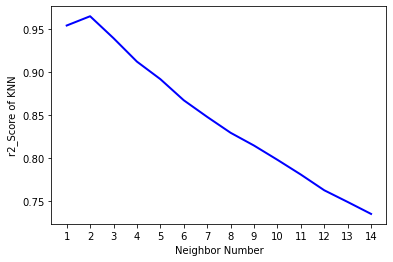

In [116]:
plt.plot(kRange, scores_list, linewidth=2, color='blue')
plt.xticks(kRange)

plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show()   

In [117]:
# Training the KNN model on the training set
regressor_knn = KNeighborsRegressor(n_neighbors = 2)

regressor_knn.fit(X_train,y_train)
pred = regressor_knn.predict(X_test)

r2_knn = r2_score(y_test,pred)
print(r2_knn)

0.9652550807699654


### Implementing Decision Tree Regressor

In [118]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=32)

In [119]:
dtr.fit(X_train, y_train)

pred = dtr.predict(X_test)

print(r2_score(y_test, pred))

0.9767646774620684


### Implementing RandomForest Regressor

In [120]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state= 10)

In [121]:
rfr.fit(X_train, y_train)

pred = rfr.predict(X_test)

print(r2_score(y_test, pred))

0.9897511751274968


### Implementing SVM

In [122]:
from sklearn.svm import SVR

svr_linear = SVR(kernel='linear')

svr_rbf = SVR(kernel='rbf')

In [123]:
svr_linear.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)

pred_linear = svr_linear.predict(X_test)
pred_rbf = svr_rbf.predict(X_test)

print(r2_score(y_test, pred_linear))
print(r2_score(y_test, pred_rbf))

0.999201627572389
0.941560650818474
